In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk/loan_data_of.csv")

In [ ]:
data.shape

(307511, 246)

In [ ]:
data = data.drop(columns = ['Unnamed: 0'])

In [ ]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(data, test_size = 0.30,
                                                    random_state = 1)

In [ ]:
X_train = train.drop(columns = ['TARGET'])
y_train = train.iloc[:, -6]

In [ ]:
X_test = test.drop(columns = ['TARGET'])
y_test = test.iloc[:, -6]

<Axes: ylabel='Frequency'>

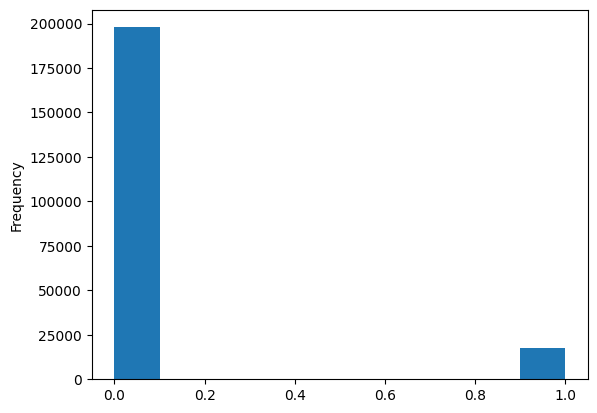

In [ ]:
y_train.astype(int).plot.hist()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 244)
Testing data shape:  (92254, 244)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 244)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [ ]:
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=e3c3455f2cc61ba8950df2175a3845a1e95458a4b0ceeca0ad024dfc368d3cf1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import *

In [ ]:
train_col = data.drop(columns = ['TARGET'])
%load_ext google.colab.data_table

In [ ]:
perm = PermutationImportance(clf, random_state = 1)
perm.fit(test, y_test)
eli5.show_weights(perm, feature_names = train_col.columns.tolist())

Weight,Feature
0.0034 ± 0.0003,OBS_30_CNT_SOCIAL_CIRCLE
0.0032 ± 0.0004,OBS_60_CNT_SOCIAL_CIRCLE
0.0020 ± 0.0003,CNT_FAM_MEMBERS
0.0017 ± 0.0003,CNT_CHILDREN
0.0006 ± 0.0002,EXT_SOURCE_3
0.0006 ± 0.0002,DEF_30_CNT_SOCIAL_CIRCLE
0.0005 ± 0.0001,REGION_RATING_CLIENT
0.0004 ± 0.0002,FLAG_OWN_CAR
0.0004 ± 0.0003,REGION_RATING_CLIENT_W_CITY
0.0003 ± 0.0001,DEF_60_CNT_SOCIAL_CIRCLE


In [37]:
eli5.explain_weights_df(perm, feature_names = train_col.columns.tolist())

,feature,weight,std
0,OBS_30_CNT_SOCIAL_CIRCLE,0.003360,0.000162
1,OBS_60_CNT_SOCIAL_CIRCLE,0.003202,0.000182
2,CNT_FAM_MEMBERS,0.002031,0.000139
3,CNT_CHILDREN,0.001697,0.000174
4,EXT_SOURCE_3,0.000627,0.000106
...,...,...,...
239,FLAG_DOCUMENT_3,-0.000264,0.000059
240,EXT_SOURCE_1,-0.000271,0.000093
241,EXT_SOURCE_2,-0.000277,0.000203
242,FLOORSMAX_MEDI,-0.000327,0.000158


In [69]:
sub_data = data[['OBS_60_CNT_SOCIAL_CIRCLE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'CNT_FAM_MEMBERS',
'CNT_CHILDREN',
'EXT_SOURCE_3',
'DEF_30_CNT_SOCIAL_CIRCLE',
'REGION_RATING_CLIENT',
'FLAG_OWN_CAR',
'DEF_60_CNT_SOCIAL_CIRCLE',
'DAYS_BIRTH',
'REGION_RATING_CLIENT_W_CITY',
'NAME_FAMILY_STATUS_Married',
'SK_ID_CURR',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'ELEVATORS_MODE',
'AMT_REQ_CREDIT_BUREAU_MON',
'ELEVATORS_MEDI',
'CODE_GENDER_F',
'OWN_CAR_AGE',
'REG_CITY_NOT_LIVE_CITY',
'DAYS_ID_PUBLISH',
'REGION_POPULATION_RELATIVE',
'FLAG_PHONE',
'HOUR_APPR_PROCESS_START',
'AMT_REQ_CREDIT_BUREAU_QRT',

'YEARS_BUILD_AVG',
'ELEVATORS_AVG',
'NAME_FAMILY_STATUS_Civil marriage',
'NAME_FAMILY_STATUS_Separated',
'OCCUPATION_TYPE_Private service staff',
'NAME_FAMILY_STATUS_Single / not married',
'LIVINGAREA_MODE',
'ORGANIZATION_TYPE_XNA',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'LANDAREA_MEDI',
'OCCUPATION_TYPE_Sales staff',
'FLAG_OWN_REALTY',
'YEARS_BUILD_MEDI',
'FLAG_DOCUMENT_8',
'OCCUPATION_TYPE_Cooking staff',
'COMMONAREA_MODE',
'FLOORSMIN_AVG',
'ORGANIZATION_TYPE_Government',
'ORGANIZATION_TYPE_Agriculture',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'EMERGENCYSTATE_MODE_No',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'ORGANIZATION_TYPE_Trade: type 3',
'DAYS_REGISTRATION',
'LIVINGAREA_MEDI',


'OCCUPATION_TYPE_Waiters/barmen staff',
'ORGANIZATION_TYPE_Construction',
'BASEMENTAREA_MEDI',
'FLOORSMIN_MODE',
'FLAG_DOCUMENT_6',
'ORGANIZATION_TYPE_Other',
'NAME_EDUCATION_TYPE_Incomplete higher',
'ORGANIZATION_TYPE_Business Entity Type 1',
'OCCUPATION_TYPE_Low-skill Laborers',
'NAME_HOUSING_TYPE_Municipal apartment',
'ORGANIZATION_TYPE_Transport: type 4',
'CODE_GENDER_M',
'ORGANIZATION_TYPE_Industry: type 1',
'OCCUPATION_TYPE_Medicine staff',
'YEARS_BUILD_MODE',
'ORGANIZATION_TYPE_Police',
'OCCUPATION_TYPE_High skill tech staff',
'CREDIT_TERM',
'ORGANIZATION_TYPE_Industry: type 11',
'AMT_INCOME_TOTAL',
'ORGANIZATION_TYPE_Housing',
'WALLSMATERIAL_MODE_Mixed',
'ORGANIZATION_TYPE_Industry: type 3',
'EXT_SOURCE_1',
'ORGANIZATION_TYPE_Bank',


'ORGANIZATION_TYPE_Industry: type 9',
'OCCUPATION_TYPE_Managers',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'WALLSMATERIAL_MODE_Wooden',
'ORGANIZATION_TYPE_Military',
'FLAG_DOCUMENT_9',
'ORGANIZATION_TYPE_Services',
'NAME_TYPE_SUITE_Other_A',
'ORGANIZATION_TYPE_Telecom',
'OCCUPATION_TYPE_Secretaries',
'NAME_TYPE_SUITE_Other_B',
'WEEKDAY_APPR_PROCESS_START_FRIDAY',
'ORGANIZATION_TYPE_School',
'NAME_FAMILY_STATUS_Widow',

'TARGET'

]]


In [56]:
sub_data = data[['OBS_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'CNT_FAM_MEMBERS',
'CNT_CHILDREN',
'EXT_SOURCE_3',
'DEF_30_CNT_SOCIAL_CIRCLE',
'REGION_RATING_CLIENT',
'FLAG_OWN_CAR',
'REGION_RATING_CLIENT_W_CITY',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OWN_CAR_AGE',
'ELEVATORS_MODE',
'NAME_FAMILY_STATUS_Married',
'AMT_REQ_CREDIT_BUREAU_QRT',
'NAME_INCOME_TYPE_Commercial associate',
'SK_ID_CURR',
'DAYS_BIRTH',
'YEARS_BEGINEXPLUATATION_MEDI',
'REGION_POPULATION_RELATIVE',
'NONLIVINGAPARTMENTS_MODE',
'ELEVATORS_MEDI',
'FLOORSMIN_AVG',
'CODE_GENDER_M',
'FLOORSMIN_MEDI',
'NAME_FAMILY_STATUS_Separated',

'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'ELEVATORS_AVG',
'NONLIVINGAPARTMENTS_MEDI',
'LANDAREA_AVG',
'FLAG_OWN_REALTY',
'NAME_INCOME_TYPE_Pensioner',
'LIVINGAPARTMENTS_MODE',
'YEARS_BUILD_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NAME_TYPE_SUITE_Family',
'YEARS_BEGINEXPLUATATION_AVG',
'OCCUPATION_TYPE_Sales staff',
'OCCUPATION_TYPE_Core staff',
'NAME_FAMILY_STATUS_Civil marriage',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'DAYS_EMPLOYED_PERCENT',
'ORGANIZATION_TYPE_Trade: type 7',
'LANDAREA_MEDI',
'FONDKAPREMONT_MODE_reg oper account',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'OCCUPATION_TYPE_High skill tech staff',
'NAME_FAMILY_STATUS_Single / not married',
'NAME_HOUSING_TYPE_Rented apartment',
'FLAG_DOCUMENT_6',
'WALLSMATERIAL_MODE_Block',

'ORGANIZATION_TYPE_Business Entity Type 2',
'NAME_FAMILY_STATUS_Widow',
'NAME_HOUSING_TYPE_Municipal apartment',
'FONDKAPREMONT_MODE_reg oper spec account',
'ENTRANCES_AVG',
'FLAG_PHONE',
'WALLSMATERIAL_MODE_Stone, brick',
'ORGANIZATION_TYPE_Industry: type 3',
'ORGANIZATION_TYPE_Industry: type 9',
'FONDKAPREMONT_MODE_org spec account',
'COMMONAREA_MODE',
'ORGANIZATION_TYPE_Kindergarten',
'ORGANIZATION_TYPE_Bank',
'ORGANIZATION_TYPE_Cleaning',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_FRIDAY',
'NAME_HOUSING_TYPE_Office apartment',
'LIVINGAPARTMENTS_AVG',
'OCCUPATION_TYPE_Accountants',
'ORGANIZATION_TYPE_Transport: type 4',
'NAME_TYPE_SUITE_Children',
'ORGANIZATION_TYPE_Business Entity Type 1',
'NAME_HOUSING_TYPE_With parents',
'NAME_EDUCATION_TYPE_Lower secondary',
'REG_REGION_NOT_LIVE_REGION',

'REG_CITY_NOT_WORK_CITY',
'OCCUPATION_TYPE_Cleaning staff',
'COMMONAREA_MEDI',
'FLAG_DOCUMENT_5',
'ORGANIZATION_TYPE_Security Ministries',
'ORGANIZATION_TYPE_Trade: type 1',
'ORGANIZATION_TYPE_Industry: type 11',
'ORGANIZATION_TYPE_Military',
'ORGANIZATION_TYPE_Transport: type 2',
'ORGANIZATION_TYPE_Housing',
'YEARS_BUILD_MEDI',
'TARGET' ]]

In [70]:
sub_data.shape

(307511, 90)

In [71]:
from sklearn.model_selection import train_test_split
train1, test1  = train_test_split(sub_data, test_size = 0.30,
                                                    random_state = 1)

In [72]:
X_train1 = train1.drop(columns = ['TARGET'])
y_train1 = train1.iloc[:, -1]

In [73]:
X_test1 = test1.drop(columns = ['TARGET'])
y_test1 = test1.iloc[:, -1]

In [74]:
y_train1.head()

208983    0
71687     0
301340    0
216927    0
109091    0
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

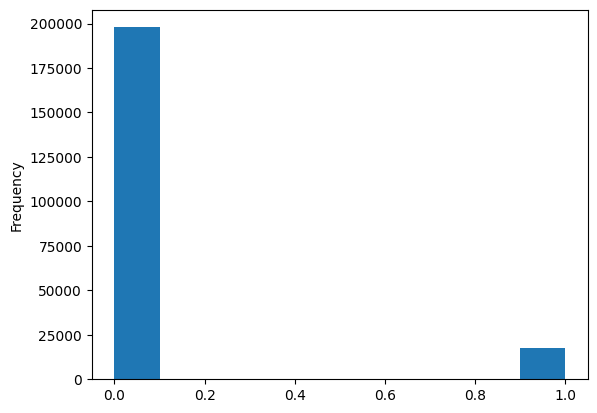

In [75]:
y_train1.astype(int).plot.hist()

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train1.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test1.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 89)
Testing data shape:  (92254, 89)


In [77]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 89)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [78]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [79]:
y_pred = clf.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.32      0.01      0.01      7467

    accuracy                           0.92     92254
   macro avg       0.62      0.50      0.48     92254
weighted avg       0.87      0.92      0.88     92254



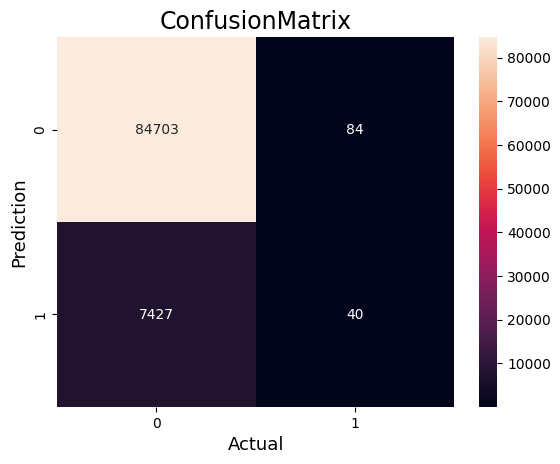

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot = True,
    fmt = 'g',
    xticklabels = ['0', '1'],
    yticklabels = ['0', '1']
)

plt.ylabel('Prediction', fontsize =13)
plt.xlabel('Actual', fontsize = 13)
plt.title('ConfusionMatrix', fontsize = 17)
plt.show()

In [90]:
y_pred_prob = clf.predict_proba(test)[:,1]
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.6680769503703867

In [82]:

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

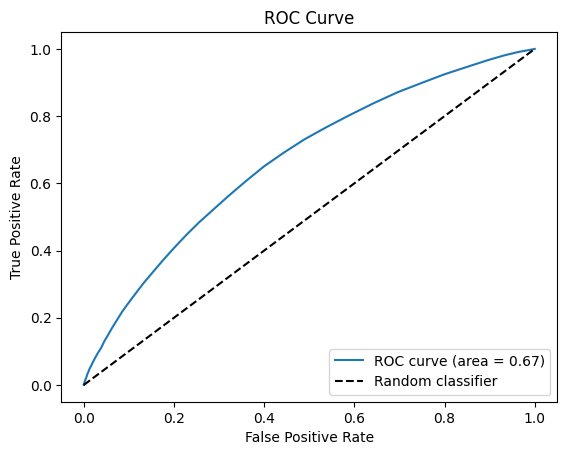

In [88]:

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()